In [ ]:
!pip install -q missingno

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set(style="whitegrid")
%matplotlib inline

from google.colab import files
print("Please upload file")
uploaded = files.upload()

fname = next(iter(uploaded.keys()))
df = pd.read_csv(fname)
print("Loaded uploaded file:", fname)

print("Data shape:", df.shape)
df.head()

Please upload file


Saving diabetes.csv to diabetes.csv
Loaded uploaded file: diabetes.csv
Data shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive stats:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Detected outcome column: Outcome
Outcome
0    500
1    268
Name: count, dtype: int64


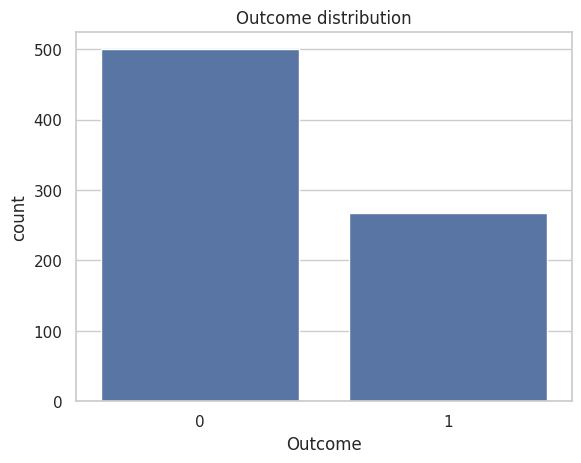

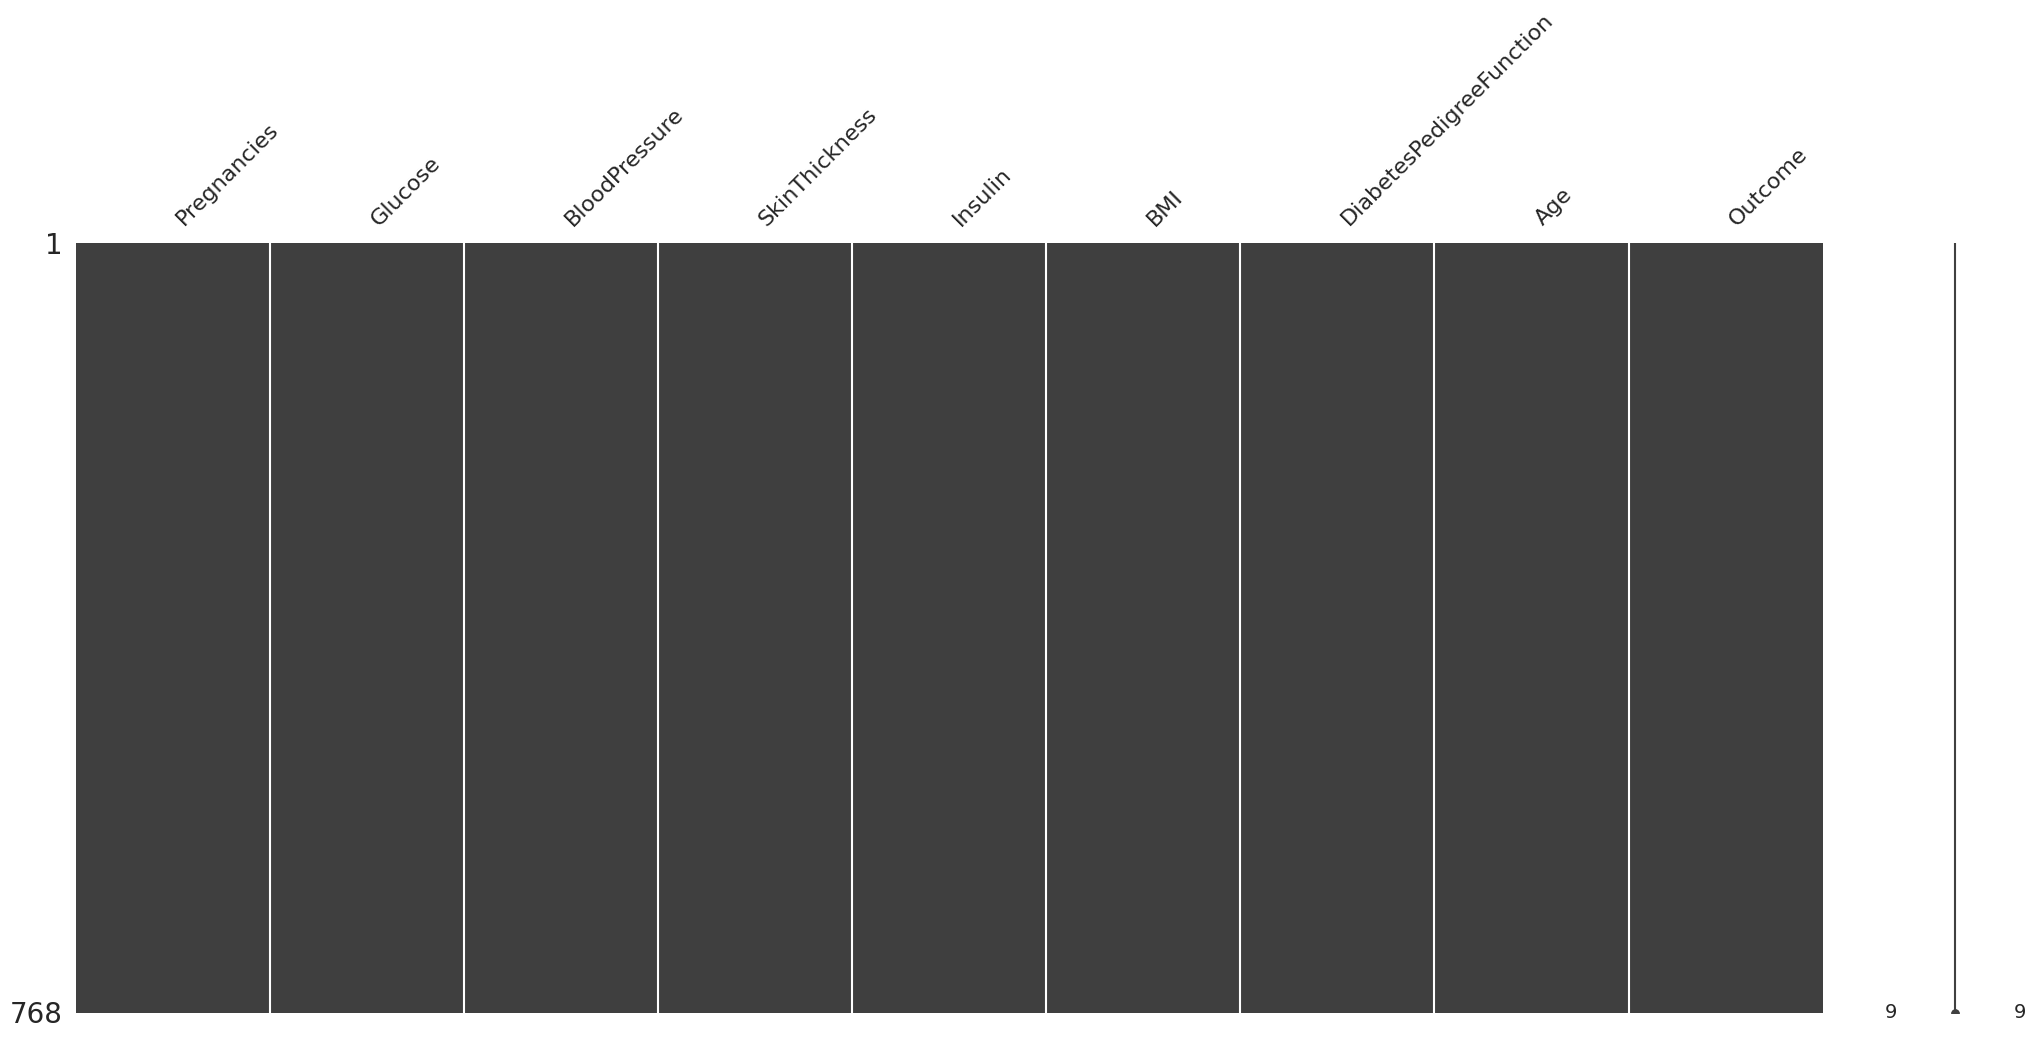

<Figure size 1200x800 with 0 Axes>

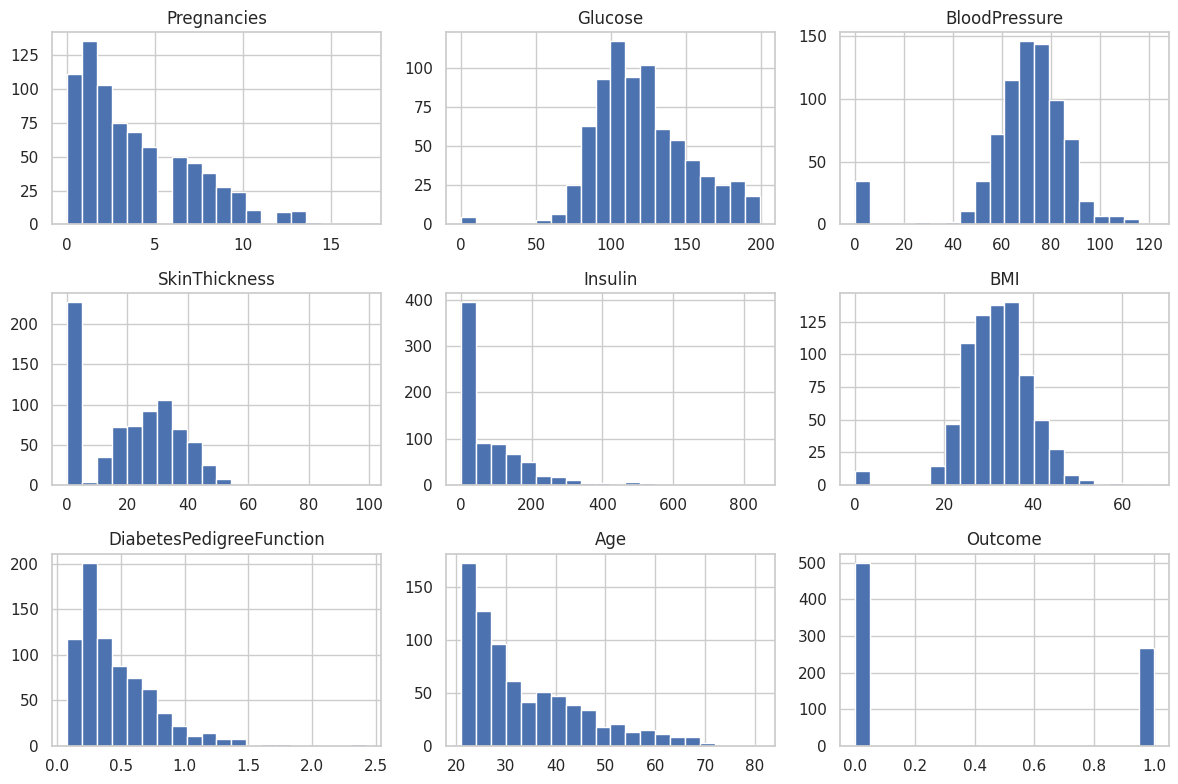

In [ ]:
print("Info:")
display(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDescriptive stats:")
display(df.describe().T)

outcome_col = None
for c in ['Outcome', 'Diabetes', 'diabetes', 'target']:
    if c in df.columns:
        outcome_col = c
        break

if outcome_col is None:
    outcome_col = df.columns[-1]
print("Detected outcome column:", outcome_col)
print(df[outcome_col].value_counts())
sns.countplot(x=outcome_col, data=df)
plt.title("Outcome distribution")
plt.show()

msno.matrix(df)
plt.show()

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12,8))
df[num_cols].hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

In [ ]:
cols_maybe_zero_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
existing = [c for c in cols_maybe_zero_missing if c in df.columns]

print("Columns to check for zero-as-missing:", existing)

for c in existing:
    num_zero = (df[c] == 0).sum()
    print(f"{c}: zeros count = {num_zero}")
    df[c] = df[c].replace(0, np.nan)

print("Missing after zero->NaN conversion:")
print(df.isnull().sum())

print("\nShape before dropna:", df.shape)
df.dropna(inplace=True)
print("Shape after dropna:", df.shape)


Columns to check for zero-as-missing: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
Glucose: zeros count = 5
BloodPressure: zeros count = 35
SkinThickness: zeros count = 227
Insulin: zeros count = 374
BMI: zeros count = 11
Missing after zero->NaN conversion:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Shape before dropna: (768, 9)
Shape after dropna: (392, 9)


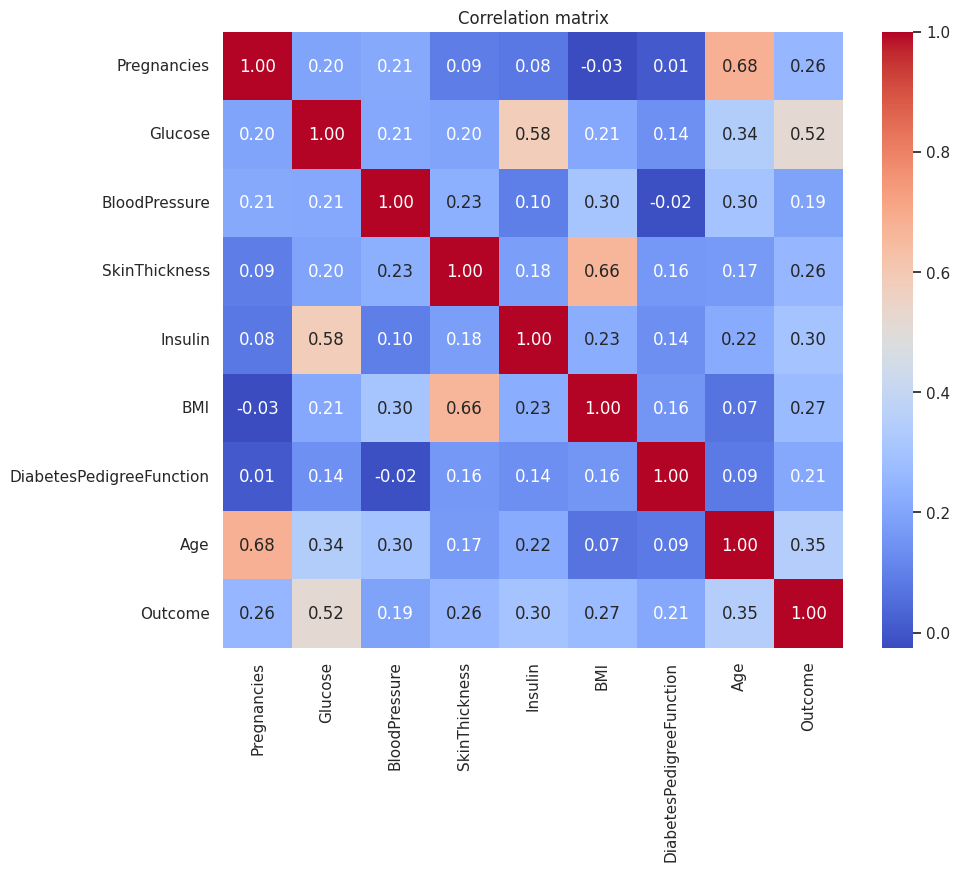

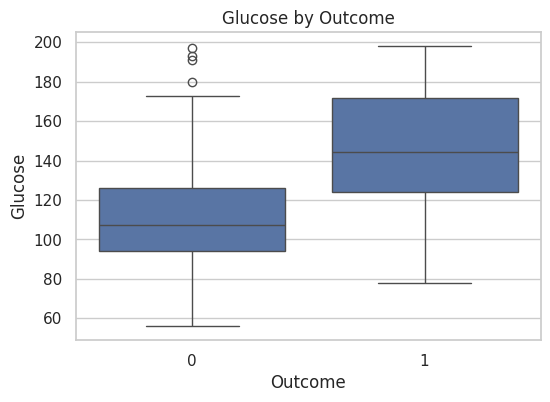

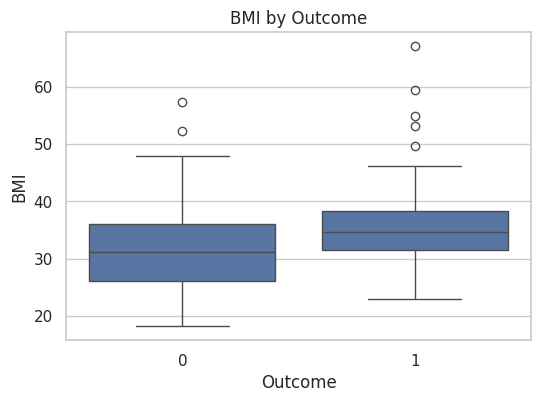

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

if 'Glucose' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=outcome_col, y='Glucose', data=df)
    plt.title("Glucose by Outcome")
    plt.show()

if 'BMI' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=outcome_col, y='BMI', data=df)
    plt.title("BMI by Outcome")
    plt.show()

In [ ]:
target = outcome_col
X = df.drop(columns=[target])
y = df[target].astype(int)

feature_names = X.columns.tolist()
print("Features:", feature_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Train shape: (313, 8) Test shape: (79, 8)


In [ ]:
# preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),# Safe
    ('scaler', StandardScaler())
])

preprocessor.fit(X_train)

X_train_prep = preprocessor.transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

print("Preprocessing done. Example transformed shape:", X_train_prep.shape)

Preprocessing done. Example transformed shape: (313, 8)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

log_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

param_grid_log = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1','l2']
}

grid_log = GridSearchCV(log_pipe, param_grid_log, cv=5, scoring='roc_auc', n_jobs=-1)
grid_log.fit(X_train, y_train)

print("Best Logistic params:", grid_log.best_params_)
best_log = grid_log.best_estimator_

# CV score
cv_scores = cross_val_score(best_log, X_train, y_train, cv=5, scoring='roc_auc')
print("Logistic CV ROC-AUC mean:", cv_scores.mean())

Best Logistic params: {'clf__C': 1, 'clf__penalty': 'l1'}
Logistic CV ROC-AUC mean: 0.8441701233338863


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 6, 10],
    'clf__max_features': ['sqrt','log2']
}

grid_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=4, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# CV score
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=4, scoring='roc_auc')
print("RF CV ROC-AUC mean:", cv_scores_rf.mean())

Best RF params: {'clf__max_depth': 6, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200}
RF CV ROC-AUC mean: 0.8490147370771464


In [14]:
# SVM
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

param_grid_svm = {
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': [0.001, 0.01, 0.1, 1]
}

grid_svm = GridSearchCV(svm_pipe, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best SVM params:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

# CV score
cv_scores_SVM = cross_val_score(best_svm, X_train, y_train, cv=4, scoring='roc_auc')
print("SVM CV ROC-AUC mean:", cv_scores_SVM.mean())

Best SVM params: {'clf__C': 10, 'clf__gamma': 0.01}
SVM CV ROC-AUC mean: 0.8578765211566373



--- Logistic ---
Accuracy: 0.8228  Precision: 0.7500  Recall: 0.6923  F1: 0.7200  ROC-AUC: 0.8861
Confusion matrix:
 [[47  6]
 [ 8 18]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        53
           1       0.75      0.69      0.72        26

    accuracy                           0.82        79
   macro avg       0.80      0.79      0.80        79
weighted avg       0.82      0.82      0.82        79



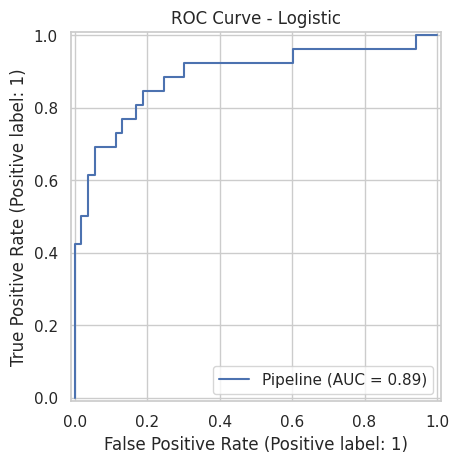


--- RandomForest ---
Accuracy: 0.8101  Precision: 0.7037  Recall: 0.7308  F1: 0.7170  ROC-AUC: 0.8723
Confusion matrix:
 [[45  8]
 [ 7 19]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        53
           1       0.70      0.73      0.72        26

    accuracy                           0.81        79
   macro avg       0.78      0.79      0.79        79
weighted avg       0.81      0.81      0.81        79



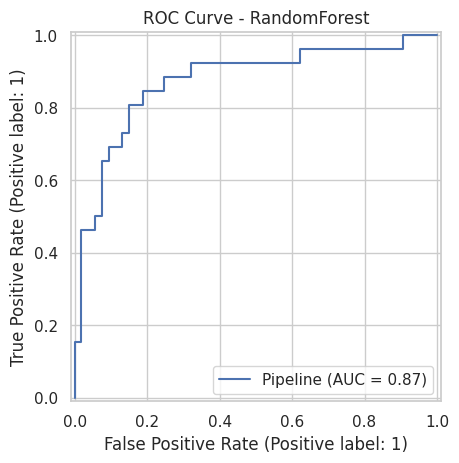


--- SVM ---
Accuracy: 0.7848  Precision: 0.6800  Recall: 0.6538  F1: 0.6667  ROC-AUC: 0.8687
Confusion matrix:
 [[45  8]
 [ 9 17]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        53
           1       0.68      0.65      0.67        26

    accuracy                           0.78        79
   macro avg       0.76      0.75      0.75        79
weighted avg       0.78      0.78      0.78        79



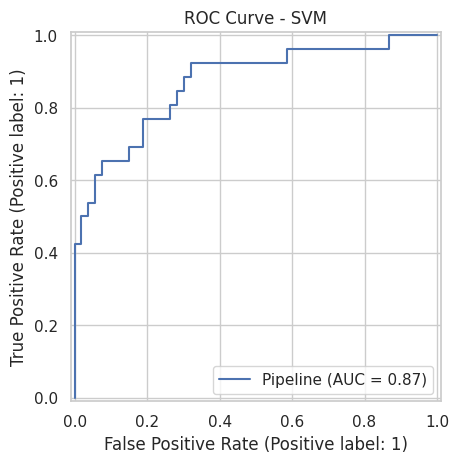

In [15]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

models = {'Logistic': best_log, 'RandomForest': best_rf, 'SVM': best_svm}

for name, m in models.items():
    y_pred = m.predict(X_test)
    y_proba = m.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  ROC-AUC: {roc:.4f}")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    # ROC plot
    RocCurveDisplay.from_estimator(m, X_test, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()

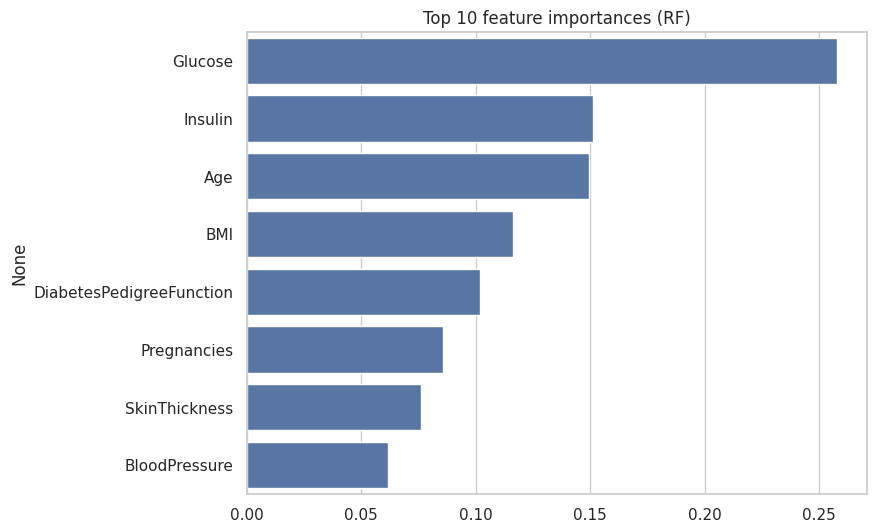

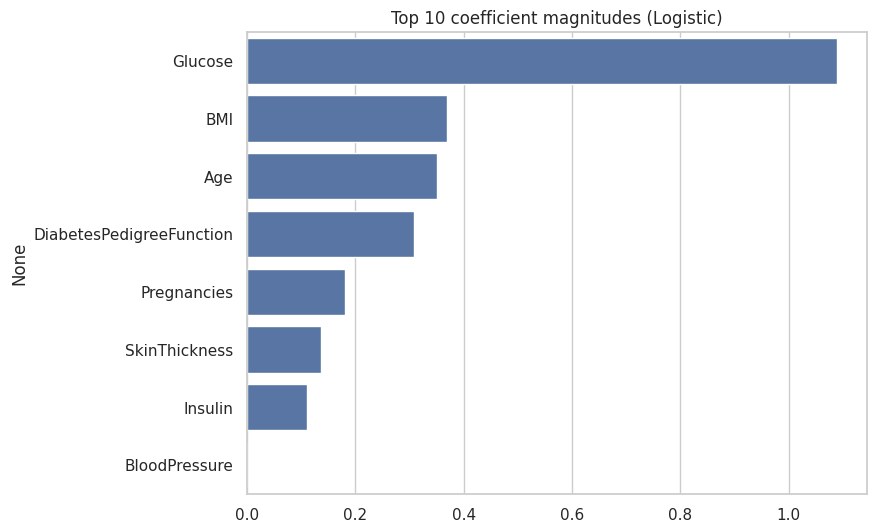

In [19]:
feat_names = feature_names

# Random Forest importances
rf_clf = best_rf.named_steps['clf']
if hasattr(rf_clf, 'feature_importances_'):
    importances = rf_clf.feature_importances_
    feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
    plt.title("Top 10 feature importances (RF)")
    plt.show()

# Logistic coefficients
log_clf = best_log.named_steps['clf']
coefs = pd.Series(log_clf.coef_[0], index=feat_names).abs().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=coefs.values[:10], y=coefs.index[:10])
plt.title("Top 10 coefficient magnitudes (Logistic)")
plt.show()

# SVM
svm_clf = best_svm.named_steps['clf']
if hasattr(svm_clf, 'coef_'):
    svm_coefs = pd.Series(svm_clf.coef_[0], index=feature_names).abs().sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=svm_coefs.values[:10], y=svm_coefs.index[:10])
    plt.title("Top 10 coefficient magnitudes (SVM)")
    plt.show()

In [20]:
log_auc = roc_auc_score(y_test, best_log.predict_proba(X_test)[:,1])
rf_auc  = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])
svm_auc = roc_auc_score(y_test, best_svm.predict_proba(X_test)[:,1])

print("Logistic AUC:", log_auc)
print("Random Forest AUC:", rf_auc)
print("SVM AUC:", svm_auc)

# Pick best
auc_scores = {"Logistic Regression": log_auc, "Random Forest": rf_auc, "SVM": svm_auc}
best_model_name = max(auc_scores, key=auc_scores.get)
best_model = {"Logistic Regression": best_log, "Random Forest": best_rf, "SVM": best_svm}[best_model_name]
print("Selected best model:", best_model_name)

# Save pipeline
import joblib
joblib.dump(best_model, "best_diabetes_pipeline.joblib")
print("Saved pipeline to best_diabetes_pipeline.joblib")

Logistic AUC: 0.886066763425254
Random Forest AUC: 0.8722786647314948
SVM AUC: 0.8686502177068214
Selected best model: Logistic Regression
Saved pipeline to best_diabetes_pipeline.joblib


In [23]:
import joblib

# load
pipe = joblib.load("best_diabetes_pipeline.joblib")
print("Loaded pipeline:", pipe)

def predict_new_patient(input_dict):
    """
    input_dict: {feature_name: value, ...}  feature names must match training X columns
    returns: prediction label (0/1) and probability of positive class
    """
    row = pd.DataFrame([input_dict], columns=feature_names)
    proba = pipe.predict_proba(row)[0][1]
    pred = int(pipe.predict(row)[0])
    return pred, proba

# Example usage
example = {col: float(X_test.iloc[0][col]) for col in feature_names}
print("Example input:", example)
pred_label, pred_prob = predict_new_patient(example)
print("Predicted:", pred_label, "Prob(positive):", pred_prob)

Loaded pipeline: Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('clf',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))])
Example input: {'Pregnancies': 7.0, 'Glucose': 187.0, 'BloodPressure': 50.0, 'SkinThickness': 33.0, 'Insulin': 392.0, 'BMI': 33.9, 'DiabetesPedigreeFunction': 0.826, 'Age': 34.0}
Predicted: 1 Prob(positive): 0.8730586355755621
